## Nauczanie maszynowe/Ćwiczenia1
Uczenie maszynowe można podzielić na:

Uczenie nadzorowane (z nauczycielem) - na podstawie danych 
 uczymy się funkcji 
, takiej że 
Uczenie nienadzorowane (bez nauczyciela) - na podstawie danych 
 uczymy się 
Uczenie ze wzmocnieniem - uczymy się polityki 
Będziemy zajmować się przede wszystkim uczeniem nadzorowanym oraz nienadzorowanym. Aby wyznaczyć parametr  rozważmy różnego typu funkcje kosztu.

W uczeniu nadzorowanym najczęsciej interesuje nas zagadnienie regresji lub klasyfikacji.

Modele dyskryminatywne a generatywne

In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data['DESCR']) #opis tych danych (DESCRIPTION)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\katar\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [82]:
d = boston_data['data']
d2 = d[:, [2,5]] #wyciągamy tylko 2 cechy: INDUS, RM
target = boston_data['target']

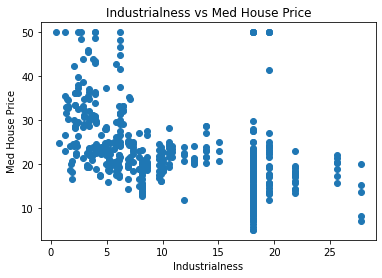

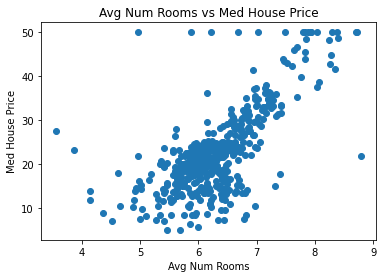

In [83]:
plt.title('Industrialness vs Med House Price')
plt.scatter(d2[:, 0], target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(d2[:, 1], target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price')
plt.show()

Funkcja kosztu mierzy średnią różnicę pomiędzy przewidywaniem a rzeczywistą wartością. Istnieje wiele funkcji tego typu

In [84]:
def loss_function(w1, w2, w0, X, t):
    """
    tutaj zdefiniuj funkcję, która przyjmuje jako argument wagi
    (w1,w2,w0), dane w postaci listy list (X) oraz wartosci (t),
    a ktora zwraca wartosc funkcji kosztu.
    """
    costs = 0
    for i in range(len(t)):
        y_i = w1 * X[i, 0] + w2 * X[i, 1] + w0
        t_i = t[i]
        costs += 0.5 * (y_i - t_i) ** 2
    return costs / len(t)
    
    pass

In [85]:
#przykladowe wywolanie
loss_function(3, 8, -1, d2, target)

2088.9192750474317

In [86]:
#przykladowe wywolanie
loss_function(-0.5, 8, -23, d2, target) #lepiej

20.61716585276679

In [87]:
##druga opcja

def loss_function1(w1, w2, w0, X, t):
    """
    tutaj zdefiniuj funkcję, która przyjmuje jako argument wagi
    (w1,w2,w0), dane w postaci listy list (X) oraz wartosci (t),
    a ktora zwraca wartosc funkcji kosztu.
    """
    sum = 0
    for i in range(np.size(t)):
        sum += 0.5*(w1*X[i, 0] + w2*X[i, 1] + w0 - t[i])**2
 
    costValue = sum/np.size(t)
    return costValue

In [51]:
#przykladowe wywolanie
loss_function1(3, 8, -1, d2, target)

2088.9192750474317

In [88]:
#przykladowe wywolanie
loss_function(-0.5, 8, -23, d2, target) #lepiej

20.61716585276679

## Zadanie1: Uzupełnij definicję powyższej funkcji.

definicja: Funkcja kosztu w regresji liniowej, to błąd średniokwadratowy (RMSE) między przewidywanym y(pred), a rzeczywistym (y). 


In [89]:
##pochodne cząstkowe po w 

def diff_loss_w1(w1, w2, w0, X, t):
    sum = 0
    for i in range(np.size(t)):
        sum += 0.5*2*X[i, 0]*(w2 * X[i, 1] - t[i] + w0 + w1 * X[i, 0])
 
    costValue = sum/np.size(t)
    return costValue
 
def diff_loss_w2(w1, w2, w0, X, t):
    sum = 0
    for i in range(np.size(t)):
        sum += 0.5*2*X[i, 1]*(X[i, 1]*w2 - t[i] + w0 + X[i, 0]*w1)
 
    costValue = sum/np.size(t)
    return costValue
 
def diff_loss_w0(w1, w2, w0, X, t):
    sum = 0
    for i in range(np.size(t)):
        sum += 0.5*2*(X[i, 1]*w2 - t[i] + w0 + X[i, 0]*w1)
 
    costValue = sum/np.size(t)
    return costValue

In [90]:
def update_weigths(w1, w2, w0, X, t, eta):
    """
    tutaj zdefiniuj funkcję, która przyjmuje jako argument wagi
    (w1,w2,w0), dane (X), wartosci (t) oraz wspolczynnik uczenia
    (eta), a ktora zwraca zaktualizowane wartosci w1, w2, w0
    """

    w1 = w1 - eta * diff_loss_w1(w1, w2, w0, X, t)
    w2 = w2 - eta * diff_loss_w2(w1, w2, w0, X, t)
    w0 = w0 - eta * diff_loss_w0(w1, w2, w0, X, t)
 
    return [w1,w2,w0]
    pass
     


In [91]:
#przykladowe wywolanie
update_weigths(3, 8, -1, d2, target, 0.001)

[2.1737704910276685, 7.6844174642145555, -1.0489697487260532]

## Zadanie2: Uzupełnij definicję powyższej funkcji.

Update weights jest funkcją obliczającą nowe wartosci parametrów w1, w2, w0 w wyniku optymalizacji kroczącej. (Optymalizacja krocząca polega na tym, że nie wiemy jak jest do końca poprawna wartośc parametrów w więc obliczamy ich wartość w wyniku stopniowego spadku gradientu)

## Zadanie3: 

Celem jest zbudowanie modelu regresji liniowej przeiwdującej target w oparciu o d2. Wystartuj z początkowych parametrów 1, 1 oraz 1. Przyjmując n=0,001  wykonaj 1000 aktualizacji tych parametrów na podstawie metody gradientu. Narysuj zależność funkcji kosztu od numeru iteracji. Wykonaj analogiczne obliczenia dla n = 0,001 oraz n = 0,00001. Skomentuj otrzymane wyniki.

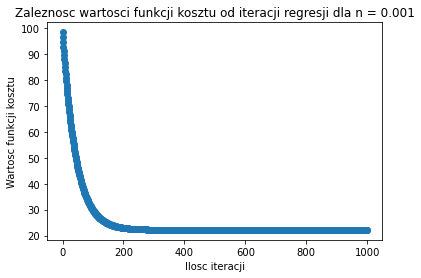

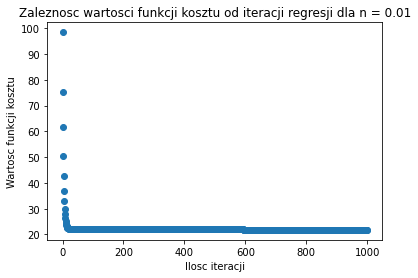

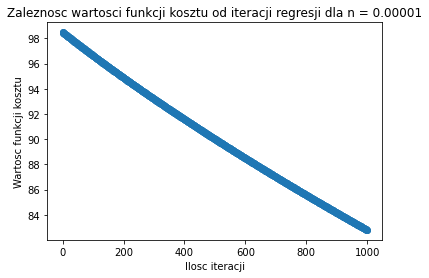

In [92]:
def lin_regress(w1, w2, w0, X, t, eta, iter):
    cost_progress = [];
    for i in range(iter):
        cost_progress.append(loss_function(w1, w2, w0, X, t))
        [w1, w2, w0] = update_weigths(w1, w2, w0, X, t, eta)
 
    return cost_progress
    pass
Y = lin_regress(1, 1, 1, d2, target, 0.001, 1000)
X = range(len(Y))
plt.scatter(X, Y)
plt.title('Zaleznosc wartosci funkcji kosztu od iteracji regresji dla n = 0.001')
plt.xlabel('Ilosc iteracji')
plt.ylabel('Wartosc funkcji kosztu')
plt.show()

Y = lin_regress(1, 1, 1, d2, target, 0.01, 1000)
X = range(len(Y))
plt.scatter(X, Y)
plt.title('Zaleznosc wartosci funkcji kosztu od iteracji regresji dla n = 0.01')
plt.xlabel('Ilosc iteracji')
plt.ylabel('Wartosc funkcji kosztu')
plt.show()

Y = lin_regress(1, 1, 1, d2, target, 0.00001, 1000)
X = range(len(Y))
plt.scatter(X, Y)
plt.title('Zaleznosc wartosci funkcji kosztu od iteracji regresji dla n = 0.00001')
plt.xlabel('Ilosc iteracji')
plt.ylabel('Wartosc funkcji kosztu')
plt.show()
    

## Zadanie4: 
Zazwyczaj nie wiemy z góry ile razy należy zmodyfikować wagi - kiedy dalsza aktualizacja nie przynosi efektu. Jednym z rozwiązań tego problemu jest sprawdzenie o jaki procent zmieniają sie aktualne wagi. Przyjmijmy, że jeżeli zmiana funkcji kosztu jest mniejsza niż 0,1% to przerywamy działanie. Ile kroków należałoby wykonać aby zrealizować poprzednie zadanie?

Oczywiście w Pythonie istnieje implementacja metody regresji liniowej

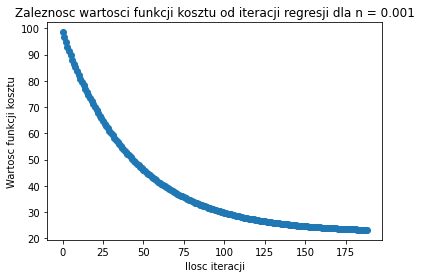

In [94]:
def lin_regress_delta(w1, w2, w0, X, t, eta, iter):
    cost_progress = []
    delta = 1
    while delta > 0.001:
        cost_progress.append(loss_function(w1, w2, w0, X, t))
        [w1, w2, w0] = update_weigths(w1, w2, w0, X, t, eta)
        if len(cost_progress) > 2:
            delta = 1 - cost_progress[-1]/cost_progress[-2]
 
 
    return cost_progress
    pass

Y = lin_regress_delta(1, 1, 1, d2, target, 0.001, 1000)
X = range(len(Y))
plt.scatter(X, Y)
plt.title('Zaleznosc wartosci funkcji kosztu od iteracji regresji dla n = 0.001')
plt.xlabel('Ilosc iteracji')
plt.ylabel('Wartosc funkcji kosztu')
plt.show()


In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
model = LinearRegression()
model.fit(d2, target);

In [97]:
model.coef_ #wspolczynnki dla zmiennych

array([-0.33471389,  7.82205511])

In [98]:
model.intercept_ #wyraz wolny

-22.89831572922507

## Zadanie5:  
Porównaj te parametry z otrzymanymi z Zadania3. Z czego może wynikać ta różnica? (te które wyszły z modelu regresji liniowej w pythonie z tymi, które obliczyliśmy z naszego modelu)

In [99]:
r_sq = model.score(d2, target) #R2 modelu
print(r_sq) 

0.5362984005856312


In [100]:
y_pred = model.predict(d2) #przewidywane y
print(y_pred[:5])

[27.75850755 24.96067296 30.93672306 31.11074967 32.27623588]


In [101]:
# obliczenie naszych parametrów od nowa 

model = LinearRegression()
model.fit(d2, target)
 
print('Wspolczynnki dla zmiennych modelu sklearn: ' + str(model.coef_))
print('Wyraz wolny modelu sklearn: ' + str(model.intercept_))
 
 
def lin_regress2(w1, w2, w0, X, t, eta, iter):
    cost_progress = []
    for i in range(iter):
        cost_progress.append(loss_function(w1, w2, w0, X, t))
        [w1, w2, w0] = update_weigths(w1, w2, w0, X, t, eta)
 
    return [w1, w2, w0]
    pass

naszeWyrazy = lin_regress2(1, 1, 1, d2, target, 0.001, 1000)
 
print('Wspolczynnki dla zmiennych naszego modelu: ' + str(naszeWyrazy[0]) + ' ' + str(naszeWyrazy[1]))
print('Wyraz wolny naszego modelu: ' + str(naszeWyrazy[2]))

Wspolczynnki dla zmiennych modelu sklearn: [-0.33471389  7.82205511]
Wyraz wolny modelu sklearn: -22.89831572922507
Wspolczynnki dla zmiennych naszego modelu: -0.52390714136992 4.350750734941031
Wyraz wolny naszego modelu: 1.2350824971678067


## Co jeżeli dane nie są liniowe?

Object `liniowe` not found.


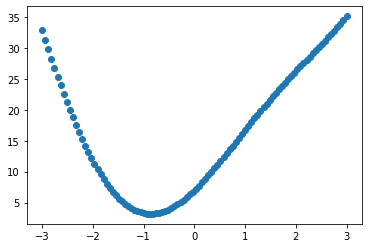

In [102]:
Co jeżeli dane nie są liniowe?
def non_linear(x):
    return 3*x**2+8*np.sin(x)+7

x = np.linspace(-3,3,100) #100 liczb z przedzialu [-3,3]
y = non_linear(x)

plt.scatter(x,y)
plt.show()

Załóżmy, że dane są tylko  oraz  oraz znana jest zależność między nimi, tzn, przy czym  są nieznane.

In [103]:
x1 = x**2
x2 = np.sin(x)
X = np.vstack((x1, x2)).T #lącze je w tablice 2D
target = y

In [104]:
w1 = 1
w2 = 1
w0 = 1

l = []

for i in range(10000):
    l.append(loss_function(w1, w2, w0, X, target))
    w1, w2, w0 = update_weigths(w1, w2, w0, X, target, 0.001)

In [105]:
w1, w2, w0

(3.013748287972514, 7.9607443561805535, 6.926201414198262)

Wniosek: Powyższa metoda może być stosowana także do nieliniowych funkcji.

## Parametry modelu a hiperparametry
parametry modelu (w1, w2, w0
)
hiperparametry (np. n ), są zewnętrzne wobec modelu
Dane zazwyczaj dzielimy na 2 lub 3 grupy - zbiór treningowy, zbiór walidacyjny oraz zbiór testowy.

Ogólnie:

Na zbiorze treningowym uczymy parametrów modelu za pomocą metody spadku gradientu.
Z użyciem zbioru walidacyjnego wybieramy najbardziej optymalne hiperparametry.
Sprawdzamy wybrany zbiór parametrów i hiperparametrów na zbiorze testowym

## Zadanie6: Rozważ jeszcze raz dane d2/target.
Podziel je na trzy podzbiory - treningowy (60%), walidacyjny (20%) oraz testowy (20%); najlepiej zdefiniuj odpowiednią funkcję.
Przetestuj różne wartości parametrów  na zbiorze walidacyjnym, na tej podstawie wybierz jeden, który użyjesz do wytrenowania parametrów modelu na zbiórze treningowym.
Na końcu wyznacz wartość funkcji kosztu na zbiorze testowym. Skomentuj otrzymane wyniki.

In [106]:
from sklearn.model_selection import train_test_split

#obliczanie parametrow w
 
X_train, X_test, y_train, y_test = train_test_split(d2, target, test_size=0.4, random_state=42)
 
X_walid, X_test, y_walid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

[w1, w2, w0] = lin_regress2(1, 1, 1, X_train, y_train, 0.001, 100)
 
#wybieranie hiperparametru
 
Y = lin_regress(1, 1, 1, d2, target, 0.001, 1000)
X = range(len(Y))
plt.scatter(X, Y)
plt.title('Zaleznosc wartosci funkcji kosztu od iteracji regresji dla n = 0.001')
plt.xlabel('Ilosc iteracji')
plt.ylabel('Wartosc funkcji kosztu')
plt.show()


#wybrano parametr ni 0.001, poniewaz daje on optymalna szybkosc spadku funkcji kosztu
 
#obliczanie wartosci funkcji kosztu na zbiorze treningowym
 
koszt = loss_function(w1, w2, w0, X_test, y_test)
 
print(koszt)

##wyniki różnią się ponieważ zbiór danych dzielimy na walidacyjny treningowy i testowy, 
##w związku z czym występuje rówżnica, ale wyniki są sprawdzone (bardziej zweryfikowane) = nie są zafałszowane



ValueError: Found input variables with inconsistent numbers of samples: [506, 100]

## Uzupełnienie

In [33]:
#podstawowe statystyki

x = np.array([11,12,13,14,15,16,17,18,19,20])
print(np.mean(x), np.median(x), np.std(x), np.var(x), np.percentile(x, 90))

15.5 15.5 2.8722813232690143 8.25 19.1


In [34]:
#liczby losowe

print(np.random.uniform(0, 5, 10))
print()
print(np.random.normal(0, 5, 10))

[3.42446502 0.70789734 1.65789733 2.23357796 1.1670603  4.04386053
 2.21983883 1.42017053 0.68568414 1.30937764]

[-3.02935259e+00 -1.42248777e+00  4.92850424e-03 -6.63946159e-01
  2.57222970e-01  4.38357431e+00  1.57837283e-02  9.16474701e+00
 -1.47015262e+00  4.70744651e+00]


In [36]:
#pandas i normalizacja (x-mean)/sd

import pandas as pd
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = pd.DataFrame({"a":[1,2,6], "b":[0,5,-5]})
print(X)
print()
scaledX = scale.fit_transform(X)
print(scaledX)

   a  b
0  1  0
1  2  5
2  6 -5

[[-0.9258201   0.        ]
 [-0.46291005  1.22474487]
 [ 1.38873015 -1.22474487]]


In [37]:
#porownaj z wynikiem wyzej
v = np.array([1,2,6])
print((v - np.mean(v))/np.std(v))

[-0.9258201  -0.46291005  1.38873015]


In [38]:
#podzial tekstu na zbior testowy i treningowy
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)
print(X)
print()
print(list(y))
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]

[0, 1, 2, 3, 4]

[[4 5]
 [0 1]
 [6 7]]

[[2 3]
 [8 9]]

[2, 0, 3]

[1, 4]
